# Investment Valuation Model: Rental Housing for 2028 Olympics 


- Q: What are we trying to do?
- A: Find undervalued properties near 2028 Olympic venues to purchase and maximize resale value.

## How do we do that?: Goals, tasks, methods of study
    A: Utilizing quantative and qualative data to analyze strategic investment opportunities, - we have identified relevant communities by targeting commercial sports venues with the highest per ticket cost and the proprties proximity to interstates or freeways. The idea behind that is that folks who spend more per ticket will likely have more disposable income and will frequent sports events more often.
       
       Opening ceremonies are planned to be held at the rising Los Angeles Rams stadium in Inglewood, with a simultaneous event at the Los Angeles Memorial Coliseum, tickets for the kickoff of the games are expected to come with an average price tag of $1,783. Closing ceremonies at the Coliseum will be somewhat less, with an average ticket price of $1,226. Therefore target properties criteria:
       2 mile radius from venue
       Inglewood city = 90304 
       Long Beach city = 90712 
       3 bedrooms 
       1 
        



# TODO
- Pull in the data
- filter for the real estate locations
    - 
    - Inglewood
    - Long Beach
- Whats the average/median home price?


data source:

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Assessor_Parcel_Data_2020.csv', low_memory=False)

In [3]:
data.head().T


,0,1,2,3,4
ZIPcode,NaN,NaN,NaN,NaN,NaN
TaxRateArea_CITY,LOS ANGELES,CALABASAS,CALABASAS,CALABASAS,LOS ANGELES
AIN,2045024042,2068024045,2068030009,2069006022,2076004025
RollYear,2020,2020,2020,2020,2020
TaxRateArea,16,10934,14999,11039,37
AssessorID,2045-024-042,2068-024-045,2068-030-009,2069-006-022,2076-004-025
PropertyLocation,NaN,NaN,NaN,NaN,NaN
PropertyType,VAC,VAC,VAC,VAC,VAC
PropertyUseCode,010V,010V,100V,010V,010V
GeneralUseType,Residential,Residential,Commercial,Residential,Residential


In [3]:
list(data.columns)

['ZIPcode',
 'TaxRateArea_CITY',
 'AIN',
 'RollYear',
 'TaxRateArea',
 'AssessorID',
 'PropertyLocation',
 'PropertyType',
 'PropertyUseCode',
 'GeneralUseType',
 'SpecificUseType',
 'SpecificUseDetail1',
 'SpecificUseDetail2',
 'totBuildingDataLines',
 'YearBuilt',
 'EffectiveYearBuilt',
 'SQFTmain',
 'Bedrooms',
 'Bathrooms',
 'Units',
 'RecordingDate',
 'LandValue',
 'LandBaseYear',
 'ImprovementValue',
 'ImpBaseYear',
 'TotalLandImpValue',
 'HomeownersExemption',
 'RealEstateExemption',
 'FixtureValue',
 'FixtureExemption',
 'PersonalPropertyValue',
 'PersonalPropertyExemption',
 'isTaxableParcel?',
 'TotalValue',
 'TotalExemption',
 'netTaxableValue',
 'SpecialParcelClassification',
 'AdministrativeRegion',
 'Cluster',
 'ParcelBoundaryDescription',
 'HouseNo',
 'HouseFraction',
 'StreetDirection',
 'StreetName',
 'UnitNo',
 'City',
 'ZIPcode5',
 'rowID',
 'CENTER_LAT',
 'CENTER_LON',
 'Location 1']

In [4]:
# find the cols I need and make the dataset smaller
cols = ['AIN', 'CENTER_LAT','CENTER_LON','TotalValue', 'Bedrooms', 'Bathrooms', 'City', 'ZIPcode5', 'SpecificUseType', 'SQFTmain',  'AssessorID', 'PropertyLocation', 'PropertyType', 'TaxRateArea_CITY', 'YearBuilt','TaxRateArea', 'netTaxableValue']
df = data[cols]
df

,AIN,CENTER_LAT,CENTER_LON,TotalValue,Bedrooms,Bathrooms,City,ZIPcode5,SpecificUseType,SQFTmain,AssessorID,PropertyLocation,PropertyType,TaxRateArea_CITY,YearBuilt,TaxRateArea,netTaxableValue
0,2045024042,34.174612,-118.643596,10.0,0,0,NaN,NaN,Single Family Residence,0,2045-024-042,NaN,VAC,LOS ANGELES,0,16,10.0
1,2068024045,34.145119,-118.639114,9.0,0,0,NaN,NaN,Single Family Residence,0,2068-024-045,NaN,VAC,CALABASAS,0,10934,9.0
2,2068030009,34.151334,-118.645489,10.0,0,0,NaN,NaN,Commercial,0,2068-030-009,NaN,VAC,CALABASAS,0,14999,10.0
3,2069006022,34.140957,-118.654253,9.0,0,0,NaN,NaN,Single Family Residence,0,2069-006-022,NaN,VAC,CALABASAS,0,11039,9.0
4,2076004025,34.158058,-118.619647,350000.0,0,0,NaN,NaN,Single Family Residence,0,2076-004-025,NaN,VAC,LOS ANGELES,0,37,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409421,8740022006,34.047818,-117.911108,372410.0,4,3,WEST COVINA CA,91791.0,Single Family Residence,2575,8740-022-006,1547 CAMBRIDGE CT WEST COVINA CA 91791,SFR,WEST COVINA,1981,9498,372410.0
2409422,8763013091,33.997520,-117.847923,541007.0,2,2,DIAMOND BAR CA,91789.0,Single Family Residence,1518,8763-013-091,1123 LOXLEY PL DIAMOND BAR CA 91789,SFR,DIAMOND BAR,1987,10085,541007.0
2409423,8763013012,33.998345,-117.846354,467875.0,2,2,DIAMOND BAR CA,91789.0,Single Family Residence,1760,8763-013-012,1102 S CROFTER DR DIAMOND BAR CA 91789,SFR,DIAMOND BAR,1980,10085,460875.0
2409424,8743015004,34.035985,-117.917319,136159.0,3,2,WEST COVINA CA,91792.0,Single Family Residence,1152,8743-015-004,2124 EVENINGSIDE DR WEST COVINA CA 91792,CND,WEST COVINA,1971,8418,129159.0


In [5]:
# data['TaxRateArea_CITY'].value_counts()[:30]

In [6]:
# filter for the areas we want

olympic_areas = ['LONG BEACH', 'INGLEWOOD']
filtered_df = df[df['TaxRateArea_CITY'].isin(olympic_areas)]

# condition of dataframe for 3 bedrooms 
filtered_df = filtered_df[filtered_df['Bedrooms'] ==3]

# year built 
filtered_df = filtered_df[(filtered_df['YearBuilt'] >= 1965) & (filtered_df['YearBuilt'] <= 1975)]

# Singlefamily residence Specific Use Type 
filtered_df = filtered_df[filtered_df['SpecificUseType'] == 'Single Family Residence']


# Bathroom
filtered_df = filtered_df[filtered_df['Bathrooms'] >= 2]

# Price range
filtered_df = filtered_df[(filtered_df['TotalValue'] >= 384000) & (filtered_df['TotalValue'] <= 800000)]

# Price per square foot 
filtered_df['pricepersqft'] = filtered_df['TotalValue']/filtered_df['SQFTmain']            
filtered_df

,AIN,CENTER_LAT,CENTER_LON,TotalValue,Bedrooms,Bathrooms,City,ZIPcode5,SpecificUseType,SQFTmain,AssessorID,PropertyLocation,PropertyType,TaxRateArea_CITY,YearBuilt,TaxRateArea,netTaxableValue,pricepersqft
691147,4014021012,33.976031,-118.344528,482428.0,3,2,INGLEWOOD CA,90302.0,Single Family Residence,1402,4014-021-012,739 E 67TH ST INGLEWOOD CA 90302,SFR,INGLEWOOD,1966,4569,475428.0,344.099857
696602,4011021028,33.964280,-118.329254,453653.0,3,3,INGLEWOOD CA,90305.0,Single Family Residence,2109,4011-021-028,3312 W 82ND ST INGLEWOOD CA 90305,SFR,INGLEWOOD,1966,4569,446653.0,215.103367
697550,4018010042,33.963878,-118.365525,510000.0,3,3,INGLEWOOD CA,90301.0,Single Family Residence,1478,4018-010-042,"550 W REGENT ST, NO 105 INGLEWOOD CA 90301",CND,INGLEWOOD,1972,4569,510000.0,345.060893
697570,4011029012,33.963896,-118.327739,497901.0,3,3,INGLEWOOD CA,90305.0,Single Family Residence,1786,4011-029-012,3203 W 83RD ST INGLEWOOD CA 90305,SFR,INGLEWOOD,1966,4569,490901.0,278.779955
697831,4018023028,33.958317,-118.365823,509814.0,3,2,INGLEWOOD CA,90301.0,Single Family Residence,1550,4018-023-028,410 S OAK ST INGLEWOOD CA 90301,SFR,INGLEWOOD,1965,4569,502814.0,328.912258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871715,7303018037,33.877489,-118.199187,445705.0,3,2,LONG BEACH CA,90805.0,Single Family Residence,1582,7303-018-037,232 E 68TH ST LONG BEACH CA 90805,SFR,LONG BEACH,1966,5490,445705.0,281.735145
1871965,7304013039,33.878537,-118.207448,384260.0,3,2,LONG BEACH CA,90805.0,Single Family Residence,1476,7304-013-039,6809 HARBOR AVE LONG BEACH CA 90805,SFR,LONG BEACH,1965,5490,377260.0,260.338753
1872389,7317008011,33.823274,-118.220840,459350.0,3,2,LONG BEACH CA,90810.0,Single Family Residence,1292,7317-008-011,2134 W CAMERON ST LONG BEACH CA 90810,SFR,LONG BEACH,1969,5572,459350.0,355.534056
1881208,7317013022,33.822177,-118.217946,403257.0,3,2,LONG BEACH CA,90810.0,Single Family Residence,1803,7317-013-022,1903 W ARLINGTON ST LONG BEACH CA 90810,SFR,LONG BEACH,1969,5572,403257.0,223.658902


In [8]:
filtered_df = filtered_df.sort_values(by='pricepersqft', ascending=False)
filtered_df.head(25)
# result = df.sort(['A', 'B'], ascending=[1, 0])

,AIN,CENTER_LAT,CENTER_LON,TotalValue,Bedrooms,Bathrooms,City,ZIPcode5,SpecificUseType,SQFTmain,AssessorID,PropertyLocation,PropertyType,TaxRateArea_CITY,YearBuilt,TaxRateArea,netTaxableValue,pricepersqft
1828577,7243007044,33.753715,-118.118107,663000.0,3,2,LONG BEACH CA,90803.0,Single Family Residence,1006,7243-007-044,"5959 E NAPLES PLZ, NO 209 LONG BEACH CA 90803",CND,LONG BEACH,1972,5500,663000.0,659.045726
1848400,7264023098,33.763370,-118.162034,719100.0,3,2,LONG BEACH CA,90803.0,Single Family Residence,1168,7264-023-098,"2601 E OCEAN BLVD, NO 805 LONG BEACH CA 90803",CND,LONG BEACH,1973,5500,712100.0,615.667808
1853418,7278009151,33.765746,-118.184211,773618.0,3,2,LONG BEACH CA,90802.0,Single Family Residence,1260,7278-009-151,"700 E OCEAN BLVD, NO 1908 LONG BEACH CA 90802",CND,LONG BEACH,1965,5536,766618.0,613.982540
1834947,7243007032,33.753715,-118.118107,615916.0,3,2,LONG BEACH CA,90803.0,Single Family Residence,1006,7243-007-032,"5959 E NAPLES PLZ, NO 108 LONG BEACH CA 90803",CND,LONG BEACH,1972,5500,615916.0,612.242545
1839630,7264023161,33.763370,-118.162034,686000.0,3,2,LONG BEACH CA,90803.0,Single Family Residence,1134,7264-023-161,"2601 E OCEAN BLVD, 705 LONG BEACH CA 90803",CND,LONG BEACH,1973,5500,686000.0,604.938272
1831921,7243007033,33.753715,-118.118107,605401.0,3,2,LONG BEACH CA,90803.0,Single Family Residence,1006,7243-007-033,"5959 E NAPLES PLZ, NO 109 LONG BEACH CA 90803",CND,LONG BEACH,1972,5500,598401.0,601.790258
1858246,7278009199,33.765746,-118.184211,757701.0,3,2,LONG BEACH CA,90802.0,Single Family Residence,1260,7278-009-199,"700 E OCEAN BLVD, NO 2508 LONG BEACH CA 90802",CND,LONG BEACH,1965,5536,750701.0,601.350000
1852426,7278009243,33.765746,-118.184211,737539.0,3,2,LONG BEACH CA,90802.0,Single Family Residence,1260,7278-009-243,"700 E OCEAN BLVD, NO 3104 LONG BEACH CA 90802",CND,LONG BEACH,1965,5536,737539.0,585.348413
1854077,7278009175,33.765746,-118.184211,734967.0,3,2,LONG BEACH CA,90802.0,Single Family Residence,1260,7278-009-175,"700 E OCEAN BLVD, NO 2208 LONG BEACH CA 90802",CND,LONG BEACH,1965,5536,727967.0,583.307143
1851191,7278009087,33.765746,-118.184211,732233.0,3,2,LONG BEACH CA,90802.0,Single Family Residence,1260,7278-009-087,"700 E OCEAN BLVD, NO 1008 LONG BEACH CA 90802",CND,LONG BEACH,1965,5536,732233.0,581.137302


In [7]:
filtered_df['City'].value_counts()

LONG BEACH CA    489
INGLEWOOD CA      61
Name: City, dtype: int64

In [8]:
filtered_df.dtypes

AIN                   int64
CENTER_LAT          float64
CENTER_LON          float64
TotalValue          float64
Bedrooms              int64
Bathrooms             int64
City                 object
ZIPcode5            float64
SpecificUseType      object
SQFTmain              int64
AssessorID           object
PropertyLocation     object
PropertyType         object
TaxRateArea_CITY     object
YearBuilt             int64
TaxRateArea           int64
netTaxableValue     float64
pricepersqft        float64
dtype: object

In [10]:
filtered_df['ZIPcode5'] = filtered_df['ZIPcode5'].astype('int')

In [13]:
filtered_df.info()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 691147 to 1882801
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AIN               550 non-null    int64  
 1   CENTER_LAT        550 non-null    float64
 2   CENTER_LON        550 non-null    float64
 3   TotalValue        550 non-null    float64
 4   Bedrooms          550 non-null    int64  
 5   Bathrooms         550 non-null    int64  
 6   City              550 non-null    object 
 7   ZIPcode5          550 non-null    int64  
 8   SpecificUseType   550 non-null    object 
 9   SQFTmain          550 non-null    int64  
 10  AssessorID        550 non-null    object 
 11  PropertyLocation  550 non-null    object 
 12  PropertyType      550 non-null    object 
 13  TaxRateArea_CITY  550 non-null    object 
 14  YearBuilt         550 non-null    int64  
 15  TaxRateArea       550 non-null    int64  
 16  netTaxableValue   550 non-null    f

,AIN,CENTER_LAT,CENTER_LON,TotalValue,Bedrooms,Bathrooms,City,ZIPcode5,SpecificUseType,SQFTmain,AssessorID,PropertyLocation,PropertyType,TaxRateArea_CITY,YearBuilt,TaxRateArea,netTaxableValue,pricepersqft
691147,4014021012,33.976031,-118.344528,482428.0,3,2,INGLEWOOD CA,90302,Single Family Residence,1402,4014-021-012,739 E 67TH ST INGLEWOOD CA 90302,SFR,INGLEWOOD,1966,4569,475428.0,344.099857
696602,4011021028,33.964280,-118.329254,453653.0,3,3,INGLEWOOD CA,90305,Single Family Residence,2109,4011-021-028,3312 W 82ND ST INGLEWOOD CA 90305,SFR,INGLEWOOD,1966,4569,446653.0,215.103367
697550,4018010042,33.963878,-118.365525,510000.0,3,3,INGLEWOOD CA,90301,Single Family Residence,1478,4018-010-042,"550 W REGENT ST, NO 105 INGLEWOOD CA 90301",CND,INGLEWOOD,1972,4569,510000.0,345.060893
697570,4011029012,33.963896,-118.327739,497901.0,3,3,INGLEWOOD CA,90305,Single Family Residence,1786,4011-029-012,3203 W 83RD ST INGLEWOOD CA 90305,SFR,INGLEWOOD,1966,4569,490901.0,278.779955
697831,4018023028,33.958317,-118.365823,509814.0,3,2,INGLEWOOD CA,90301,Single Family Residence,1550,4018-023-028,410 S OAK ST INGLEWOOD CA 90301,SFR,INGLEWOOD,1965,4569,502814.0,328.912258


<AxesSubplot:>

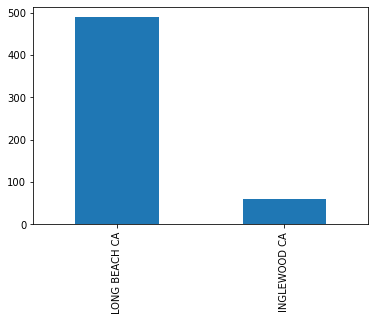

In [14]:
filtered_df['City'].value_counts().plot(kind='bar')

<AxesSubplot:>

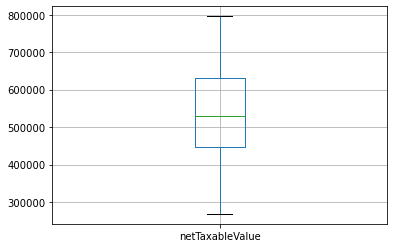

In [11]:
filtered_df.boxplot(column=['netTaxableValue'])

In [12]:
filtered_df.columns

Index(['AIN', 'CENTER_LAT', 'CENTER_LON', 'TotalValue', 'Bedrooms',
       'Bathrooms', 'City', 'ZIPcode5', 'SpecificUseType', 'SQFTmain',
       'AssessorID', 'PropertyLocation', 'PropertyType', 'TaxRateArea_CITY',
       'YearBuilt', 'TaxRateArea', 'netTaxableValue', 'pricepersqft'],
      dtype='object')

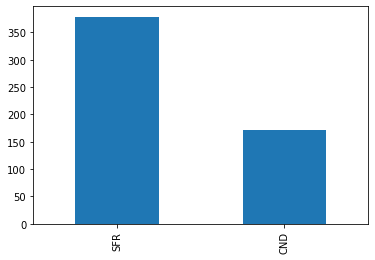

In [16]:
# Analysis of SFR vs CND in area
import matplotlib.pyplot as plt
fig = filtered_df['PropertyType'].value_counts().plot(kind='bar').get_figure()

fig.savefig('propertytypes.jpg')

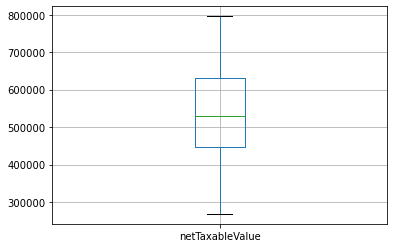

In [17]:
fig = filtered_df.boxplot(column=['netTaxableValue']).get_figure()
fig.savefig('anotherimage.jpg')

<AxesSubplot:>

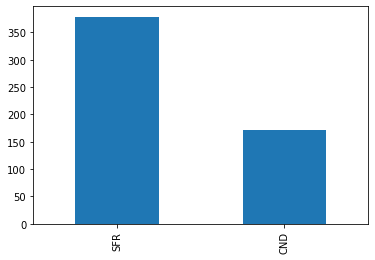

In [13]:
filtered_df['PropertyType'].value_counts().plot(kind='bar')

In [14]:
filtered_df['ZIPcode5'].value_counts()

90803.0    144
90807.0     88
90815.0     85
90808.0     54
90305.0     47
90802.0     42
90814.0     29
90805.0     27
90301.0     10
90806.0      8
90804.0      4
90810.0      4
90813.0      3
90303.0      2
90302.0      2
90220.0      1
Name: ZIPcode5, dtype: int64

In [15]:
# Boolean Conditional requesting optimal square footage
mask_filter=filtered_df['SQFTmain'].between(1100,1500)
filtered_df[mask_filter]

,AIN,CENTER_LAT,CENTER_LON,TotalValue,Bedrooms,Bathrooms,City,ZIPcode5,SpecificUseType,SQFTmain,AssessorID,PropertyLocation,PropertyType,TaxRateArea_CITY,YearBuilt,TaxRateArea,netTaxableValue,pricepersqft
1848400,7264023098,33.763370,-118.162034,719100.0,3,2,LONG BEACH CA,90803.0,Single Family Residence,1168,7264-023-098,"2601 E OCEAN BLVD, NO 805 LONG BEACH CA 90803",CND,LONG BEACH,1973,5500,712100.0,615.667808
1853418,7278009151,33.765746,-118.184211,773618.0,3,2,LONG BEACH CA,90802.0,Single Family Residence,1260,7278-009-151,"700 E OCEAN BLVD, NO 1908 LONG BEACH CA 90802",CND,LONG BEACH,1965,5536,766618.0,613.982540
1839630,7264023161,33.763370,-118.162034,686000.0,3,2,LONG BEACH CA,90803.0,Single Family Residence,1134,7264-023-161,"2601 E OCEAN BLVD, 705 LONG BEACH CA 90803",CND,LONG BEACH,1973,5500,686000.0,604.938272
1858246,7278009199,33.765746,-118.184211,757701.0,3,2,LONG BEACH CA,90802.0,Single Family Residence,1260,7278-009-199,"700 E OCEAN BLVD, NO 2508 LONG BEACH CA 90802",CND,LONG BEACH,1965,5536,750701.0,601.350000
1852426,7278009243,33.765746,-118.184211,737539.0,3,2,LONG BEACH CA,90802.0,Single Family Residence,1260,7278-009-243,"700 E OCEAN BLVD, NO 3104 LONG BEACH CA 90802",CND,LONG BEACH,1965,5536,737539.0,585.348413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710320,4025004032,33.958406,-118.335367,411322.0,3,2,INGLEWOOD CA,90305.0,Single Family Residence,1493,4025-004-032,"3500 W MANCHESTER BLVD, NO 449 INGLEWOOD CA ...",SFR,INGLEWOOD,1965,4569,268049.0,275.500335
1766210,7141019047,33.823001,-118.196526,385945.0,3,2,LONG BEACH CA,90807.0,Single Family Residence,1423,7141-019-047,"3659 COUNTRY CLUB DR, UNIT C LONG BEACH CA ...",CND,LONG BEACH,1975,5500,385945.0,271.219255
1869328,7304013040,33.878467,-118.207447,392309.0,3,2,LONG BEACH CA,90805.0,Single Family Residence,1476,7304-013-040,6801 HARBOR AVE LONG BEACH CA 90805,SFR,LONG BEACH,1965,5490,392309.0,265.792005
1804962,7208002030,33.803217,-118.191458,384947.0,3,2,LONG BEACH CA,90806.0,Single Family Residence,1462,7208-002-030,200 E VERNON ST LONG BEACH CA 90806,CND,LONG BEACH,1969,11934,384947.0,263.301642


OSError: Could not find lib c or load any of its variants [].